In [9]:
import pickle, sys
import numpy as np
sys.path.append('/pbs/throng/lsst/users/cpayerne/CLMassDC2/modules/')
import utils
import CL_WL_DATAOPS_make_profile as prf
import matplotlib.pyplot as plt
#import CL_WL_fit_cluster_mass_v1 as fit

In [10]:

def load(filename, **kwargs):

    with open(filename, 'rb') as fin:
        
        return pickle.load(fin, **kwargs)

In [11]:
profile_RedMapper_dc2dr6_HSM = load('/pbs/throng/lsst/users/cpayerne/ThesisAtCCin2p3/p_RedMapper_clusters/paper_dc2_galaxy_cluster_mass/data_DS/M200cw_M200c/dc2dr6_HSM_discussion_wl.pkl')
profile_RedMapper_dc2dr6_Metacal = load('/pbs/throng/lsst/users/cpayerne/ThesisAtCCin2p3/p_RedMapper_clusters/paper_dc2_galaxy_cluster_mass/data_DS/M200cw_M200c/dc2dr6_discussion_wl2.pkl')
profile_RedMapper_cosmodc2 = load('/pbs/throng/lsst/users/cpayerne/ThesisAtCCin2p3/p_RedMapper_clusters/paper_dc2_galaxy_cluster_mass/data_DS/M200cw_M200c/true_shape_true_z_individual_cosmodc2_x_RedMapper_center.pkl')

In [31]:
gt_av = profile_RedMapper_dc2dr6_Metacal['gt_av']
R_T = profile_RedMapper_dc2dr6_Metacal['<R_T>']
a_calib = []
for i, gt in enumerate(gt_av):
    R = R_T[i]
    norm = profile_RedMapper_dc2dr6_Metacal['norm_sum'][i]
    a_calib.append(np.array([gt[j]/(R[j]) if norm[j] != 0 else 0 for j in range(len(gt))]))
profile_RedMapper_dc2dr6_Metacal['gt_av_calib'] = np.array(a_calib)
profile_RedMapper_dc2dr6_HSM['gt_av_calib'] = profile_RedMapper_dc2dr6_HSM['gt_av']/.85

In [32]:
def binning(corner): return [[corner[i],corner[i+1]] for i in range(len(corner)-1)]
z_corner = np.linspace(0.2, .5, 2)
Z_bin = binning(z_corner)
m_corner = np.logspace(14,14.5, 2)
Mass_bin = binning(m_corner)

In [33]:
m_corner

array([1.00000000e+14, 3.16227766e+14])

(array([ 11.,  18.,  44., 152., 466., 686., 450., 211.,  67.,  28.]),
 array([13.03138193, 13.22757182, 13.42376171, 13.6199516 , 13.81614149,
        14.01233138, 14.20852127, 14.40471116, 14.60090106, 14.79709095,
        14.99328084]),
 <BarContainer object of 10 artists>)

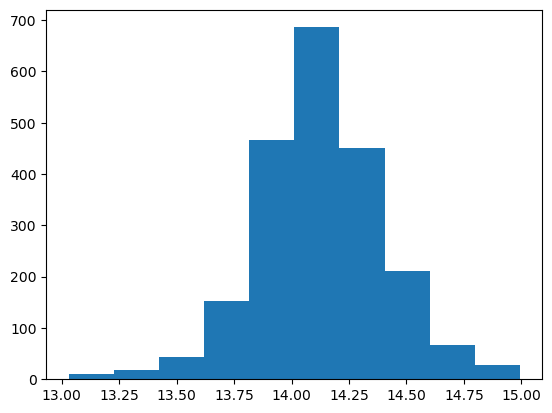

In [34]:
plt.hist(np.log10(profile_RedMapper_dc2dr6_Metacal['M200c_cosmodc2']))

In [35]:
profile_cosmodc2_stack = prf.stacked_profile(profile = profile_RedMapper_cosmodc2,
                    r_in = 'radius',
                    gt_in = 'gt', gx_in = 'gx',
                    r_out = 'radius',
                    gt_out = 'gt', gx_out = 'gx',
                    weight = 'norm',
                    z_name = 'cluster_z', obs_name = 'M200c_cosmodc2',
                    Z_bin = Z_bin, Obs_bin = Mass_bin)

covariance_cosmodc2_stack = prf.bootstrap_covariance(profile = profile_RedMapper_cosmodc2,
                    r_in = 'radius',
                    gt_in = 'gt', gx_in = 'gx',
                    r_out = 'radius',
                    gt_out = 'gt', gx_out = 'gx',
                    weight = 'norm',
                    n_boot = 100,
                    z_name = 'cluster_z', obs_name = 'M200c_cosmodc2',
                    Z_bin = Z_bin, Obs_bin = Mass_bin)

542


In [36]:
profile_dc2dr6_stack_Meatcal = prf.stacked_profile(profile = profile_RedMapper_dc2dr6_Metacal,
                    r_in = 'radius_av',
                    gt_in = 'gt_av_calib', gx_in = 'gx_av',
                    r_out = 'radius',
                    gt_out = 'gt', gx_out = 'gx',
                    weight = 'norm_sum',
                    z_name = 'cluster_z', obs_name = 'M200c_cosmodc2',
                    Z_bin = Z_bin, Obs_bin = Mass_bin)

437


In [37]:
covariance_dc2dr6_stack_Metacal = prf.bootstrap_covariance(profile = profile_RedMapper_dc2dr6_Metacal,
                    r_in = 'radius_av',
                    gt_in = 'gt_av_calib', gx_in = 'gx_av',
                    r_out = 'radius',
                    gt_out = 'gt', gx_out = 'gx',
                    weight = 'norm_sum',
                    n_boot = 200,
                    z_name = 'cluster_z', obs_name = 'M200c_cosmodc2',
                    Z_bin = Z_bin, Obs_bin = Mass_bin)

In [38]:
profile_dc2dr6_stack_Meatcal_uncalib = prf.stacked_profile(profile = profile_RedMapper_dc2dr6_Metacal,
                    r_in = 'radius_av',
                    gt_in = 'gt_av', gx_in = 'gx_av',
                    r_out = 'radius',
                    gt_out = 'gt', gx_out = 'gx',
                    weight = 'norm_sum',
                    z_name = 'cluster_z', obs_name = 'M200c_cosmodc2',
                    Z_bin = Z_bin, Obs_bin = Mass_bin)

437


In [39]:
profile_dc2dr6_stack_HSM = prf.stacked_profile(profile = profile_RedMapper_dc2dr6_HSM,
                    r_in = 'radius_av',
                    gt_in = 'gt_av', gx_in = 'gx_av',
                    r_out = 'radius',
                    gt_out = 'gt', gx_out = 'gx',
                    weight = 'norm_sum',
                    z_name = 'cluster_z', obs_name = 'M200c_cosmodc2',
                    Z_bin = Z_bin, Obs_bin = Mass_bin)

covariance_dc2dr6_stack_HSM = prf.bootstrap_covariance(profile = profile_RedMapper_dc2dr6_HSM,
                    r_in = 'radius_av',
                    gt_in = 'gt_av', gx_in = 'gx_av',
                    r_out = 'radius',
                    gt_out = 'gt', gx_out = 'gx',
                    weight = 'norm_sum',
                    n_boot = 200,
                    z_name = 'cluster_z', obs_name = 'M200c_cosmodc2',
                    Z_bin = Z_bin, Obs_bin = Mass_bin)

437


In [40]:
profile_dc2dr6_stack_HSM_calib = prf.stacked_profile(profile = profile_RedMapper_dc2dr6_HSM,
                    r_in = 'radius_av',
                    gt_in = 'gt_av_calib', gx_in = 'gx_av',
                    r_out = 'radius',
                    gt_out = 'gt', gx_out = 'gx',
                    weight = 'norm_sum',
                    z_name = 'cluster_z', obs_name = 'M200c_cosmodc2',
                    Z_bin = Z_bin, Obs_bin = Mass_bin)

covariance_dc2dr6_stack_HSM_calib = prf.bootstrap_covariance(profile = profile_RedMapper_dc2dr6_HSM,
                    r_in = 'radius_av',
                    gt_in = 'gt_av_calib', gx_in = 'gx_av',
                    r_out = 'radius',
                    gt_out = 'gt', gx_out = 'gx',
                    weight = 'norm_sum',
                    n_boot = 200,
                    z_name = 'cluster_z', obs_name = 'M200c_cosmodc2',
                    Z_bin = Z_bin, Obs_bin = Mass_bin)

437


[46052135382100.984 39948826558617.14 35016909475946.65 31754392442989.305
 29479772851334.336 27360671918163.645 24312506588262.844
 20322866318426.508 17444104812650.082 15188481604565.97 12635563382761.21
 10442074637440.918 9023390817459.277 7876877320429.433 6313890661554.115
 5302136995034.289 4642292539507.514 4146218238469.6206 3419514432542.977
 2995958243908.59]
['z_mean', 'obs_mean', 'obs_rms', 'radius', 'gt', 'gx', 'gt_individual', 'radius_individual', 'n_stack', 'cluster_id', 'z_individual', 'obs_individual', 'z_bin', 'obs_bin']
['z_mean', 'obs_mean', 'obs_rms', 'radius', 'gt', 'gx', 'gt_individual', 'radius_individual', 'n_stack', 'cluster_id', 'z_individual', 'obs_individual', 'z_bin', 'obs_bin']


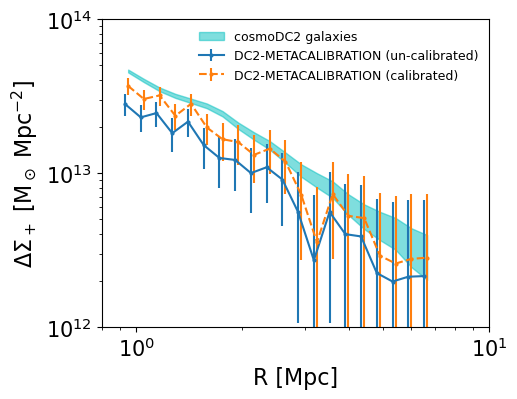

In [41]:
plt.figure(figsize=(5, 4))
color = [ 'C0', 'C1', 'C1']
fmt= ['-', '--', '-', '-']
label = ['cosmoDC2 galaxies', 'DC2-METACALIBRATION (un-calibrated)', r'DC2-METACALIBRATION (calibrated)', 'HSM (un-calibrated)']
covariance = [covariance_cosmodc2_stack ,covariance_dc2dr6_stack_Metacal, covariance_dc2dr6_stack_Metacal, ]
cc = np.sqrt(np.array(covariance[0][0]['cov_t'].T.diagonal())[0])
print(profile_cosmodc2_stack[0]['gt'])
s1=profile_cosmodc2_stack[0]['gt'] - cc
s1 = [s1[i] for i in range(len(s1))]
s11=profile_cosmodc2_stack[0]['gt'] + cc
s11 = [s11[i] for i in range(len(s11))]
s2=profile_cosmodc2_stack[0]['radius']
s2 = [s2[i] for i in range(len(s2))]
plt.fill_between(s2, s1, s11, color='c', alpha=.5, label=label[0])


for f, profile_ in enumerate([profile_dc2dr6_stack_Meatcal_uncalib, profile_dc2dr6_stack_Meatcal, ]):
    print(profile_.colnames)
    cc = np.sqrt(np.array(covariance[f+1][0]['cov_t'].T.diagonal())[0])
    plt.errorbar(profile_cosmodc2_stack[0]['radius'] + (f-1)*0.02*profile_cosmodc2_stack[0]['radius'], profile_[0]['gt'], cc,  fmt = fmt[f], color =  color[f], label = label[f+1], marker='o', markersize=2)
    plt.loglog()
    #plt.errorbar(profile_['radius'], profile_['gt'], 
    #                # cc, 
     #                color = c[f] , fmt = ' ', 
    #    marker = marker[f], label = label_choose, elinewidth = 2, capsize = 8, markersize = markersize[f], markerfacecolor = None)
plt.xlim(0.8, 10)
plt.ylim(1e12, 1e14)
plt.tick_params(axis='both', which = 'both', labelsize= 15)
plt.legend(loc='upper right',frameon = False, fontsize = 9)
plt.xlabel('R [Mpc]', fontsize = 16)
plt.ylabel(r'$\Delta\Sigma_+$ ' +'$[$' + r'${\rm M}$' + r'$_\odot\;$'+ r'${\rm Mpc}$'+r'$^{-2}$'r'$]$', fontsize = 16)
plt.savefig('Metacal_profiles', bbox_inches='tight', dpi=300)

[46052135382100.984 39948826558617.14 35016909475946.65 31754392442989.305
 29479772851334.336 27360671918163.645 24312506588262.844
 20322866318426.508 17444104812650.082 15188481604565.97 12635563382761.21
 10442074637440.918 9023390817459.277 7876877320429.433 6313890661554.115
 5302136995034.289 4642292539507.514 4146218238469.6206 3419514432542.977
 2995958243908.59]


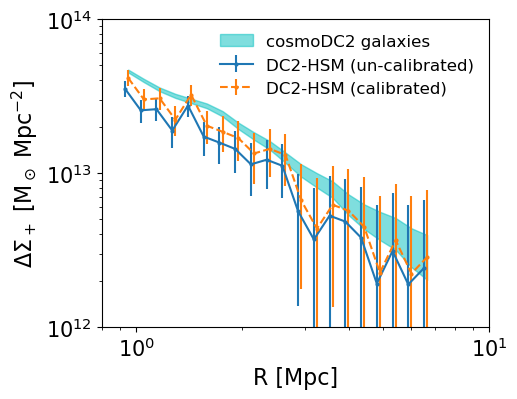

In [42]:
plt.figure(figsize=(5, 4))
color = [ 'C0', 'C1', 'C1']
fmt= ['-', '--', '-', '-']
label = ['cosmoDC2 galaxies',  'DC2-HSM (un-calibrated)', 'DC2-HSM (calibrated)']
covariance = [covariance_cosmodc2_stack ,covariance_dc2dr6_stack_HSM, covariance_dc2dr6_stack_HSM_calib]
cc = np.sqrt(np.array(covariance[0][0]['cov_t'].T.diagonal())[0])
print(profile_cosmodc2_stack[0]['gt'])
s1=profile_cosmodc2_stack[0]['gt'] - cc
s1 = [s1[i] for i in range(len(s1))]
s11=profile_cosmodc2_stack[0]['gt'] + cc
s11 = [s11[i] for i in range(len(s11))]
s2=profile_cosmodc2_stack[0]['radius']
s2 = [s2[i] for i in range(len(s2))]
plt.fill_between(s2, s1, s11, color='c', alpha=.5, label=label[0])


for f, profile_ in enumerate([ profile_dc2dr6_stack_HSM, profile_dc2dr6_stack_HSM_calib]):

    cc = np.sqrt(np.array(covariance[f+1][0]['cov_t'].T.diagonal())[0])
    plt.errorbar(profile_cosmodc2_stack[0]['radius'] + (f-1)*0.02*profile_cosmodc2_stack[0]['radius'], profile_[0]['gt'], cc,  fmt = fmt[f], color =  color[f], label = label[f+1], marker='o', markersize=2)
    plt.loglog()
    
    #plt.errorbar(profile_['radius'], profile_['gt'], 
    #                # cc, 
     #                color = c[f] , fmt = ' ', 
    #    marker = marker[f], label = label_choose, elinewidth = 2, capsize = 8, markersize = markersize[f], markerfacecolor = None)
plt.xlim(0.8, 10)
plt.ylim(1e12, 1e14)
plt.tick_params(axis='both', which = 'both', labelsize= 15)
plt.legend(loc='upper right',frameon = False, fontsize = 12)
plt.xlabel('R [Mpc]', fontsize = 16)
plt.ylabel(r'$\Delta\Sigma_+$ ' +'$[$' + r'${\rm M}$' + r'$_\odot\;$'+ r'${\rm Mpc}$'+r'$^{-2}$'r'$]$', fontsize = 16)
plt.savefig('HSM_profiles', bbox_inches='tight', dpi=300)